In [5]:
import numpy as np
import os
import cv2
from model_utils_sw import MaskToBinary2D
from sklearn.metrics import jaccard_similarity_score

sample_dir='../'
phases=['train_gen_256', 'train_masks_256']

# gen_image=os.listdir(os.path.join(sample_dir, phases[0]))
# label_image=os.listdir(os.path.join(sample_dir, phases[1]))
subjects=os.listdir(os.path.join(sample_dir, phases[0]))

def chk_no_mask_3d(array):
    x,y,z=np.where(array!=0)
    if len(x)*len(y)*len(z) == 0:
        return True
    else:
        return False
    
NO_MASK_ONE=True

whole_jaccard_IDHwt=[]
for subject in subjects:
    k=0
    jaccard_sum=0
    
    gen_image=os.listdir(os.path.join(sample_dir, phases[0], subject))
    label_image=os.listdir(os.path.join(sample_dir, phases[1], subject))
    
    for gen, label in zip(gen_image, label_image):
        gen_im=MaskToBinary2D(cv2.imread(os.path.join(sample_dir, phases[0], subject, gen)))
        label_im=MaskToBinary2D(cv2.imread(os.path.join(sample_dir, phases[1], subject, label)))

        if chk_no_mask_3d(label_im) and chk_no_mask_3d(gen_im):
            if NO_MASK_ONE:
                k+=1
                jaccard_sum+=1
            else:
                continue
        else:
            k+=1
            jaccard_sum+=jaccard_similarity_score(label_im[:,:,0], gen_im[:,:,0])
        
    print('{} | average jaccard score -- {:4f}'.format(subject, float(jaccard_sum) / k))
    whole_jaccard_IDHwt.append(float(jaccard_sum) / k)
print('whole average jaccard score -- {:4f}'.format(np.mean(whole_jaccard_IDHwt)))

1371892 | average jaccard score -- 0.813595
2034571 | average jaccard score -- 0.795222
2174093 | average jaccard score -- 0.854775
2479047 | average jaccard score -- 0.736046
2530541 | average jaccard score -- 0.759026
2545167 | average jaccard score -- 0.803850
2561276 | average jaccard score -- 0.843774
2595099 | average jaccard score -- 0.805559
2602057 | average jaccard score -- 0.797186
2659261 | average jaccard score -- 0.906827
2917442 | average jaccard score -- 0.877862
3263248 | average jaccard score -- 0.644896
3692092 | average jaccard score -- 0.663352
3893850 | average jaccard score -- 0.687259
3938641 | average jaccard score -- 0.790958
4331755 | average jaccard score -- 0.914593
4334564 | average jaccard score -- 0.958399
4413737 | average jaccard score -- 0.753982
5111647 | average jaccard score -- 0.849418
5166832 | average jaccard score -- 0.639878
5184971 | average jaccard score -- 0.710413
5199303 | average jaccard score -- 0.828590
5208895 | average jaccard score 

In [7]:
# Test on TCGA external dataset

sample_dir='../segmentation_testset/'
phases=['TCGA_gen_256', 'TCGA_mask_256']

subjects=os.listdir(os.path.join(sample_dir, phases[0]))
whole_dice_TCGA=[]

for subject in subjects:
    k=0
    jaccard_sum=0
    
    gen_image=os.listdir(os.path.join(sample_dir, phases[0], subject))
    label_image=os.listdir(os.path.join(sample_dir, phases[1], subject))
    
    for gen, label in zip(gen_image, label_image):
        gen_im=MaskToBinary2D(cv2.imread(os.path.join(sample_dir, phases[0], subject, gen)))
        label_im=MaskToBinary2D(cv2.imread(os.path.join(sample_dir, phases[1], subject, label)))

        if chk_no_mask_3d(label_im) and chk_no_mask_3d(gen_im):
            if NO_MASK_ONE:
                k+=1
                jaccard_sum+=1
            else:
                continue
        else:
            k+=1
#             print(label, DiceCoefficient(label_im[:,:,0], gen_im[:,:,0]))
            jaccard_sum+=jaccard_similarity_score(label_im[:,:,0], gen_im[:,:,0])
        
    print('{} | average jaccard score -- {:4f}'.format(subject, float(jaccard_sum) / k))
    whole_dice_TCGA.append(float(jaccard_sum) / k)
    
print('whole average jaccard score -- {:4f}'.format(np.mean(whole_dice_TCGA)))

CS_5395 | average jaccard score -- 0.690576
CS_5397 | average jaccard score -- 0.738441
CS_6186 | average jaccard score -- 0.591230
CS_6188 | average jaccard score -- 0.435901
CS_6669 | average jaccard score -- 0.719500
DU_5852 | average jaccard score -- 0.760701
DU_7014 | average jaccard score -- 0.632745
DU_8158 | average jaccard score -- 0.704458
DU_8162 | average jaccard score -- 0.652362
DU_8165 | average jaccard score -- 0.526931
DU_A5TT | average jaccard score -- 0.718370
FG_5963 | average jaccard score -- 0.465860
FG_6692 | average jaccard score -- 0.569975
FG_7643 | average jaccard score -- 0.754224
FG_A4MU | average jaccard score -- 0.510341
HT_7469 | average jaccard score -- 0.664008
HT_7680 | average jaccard score -- 0.528532
HT_7854 | average jaccard score -- 0.528473
HT_7860 | average jaccard score -- 0.846748
HT_7882 | average jaccard score -- 0.869734
HT_8015 | average jaccard score -- 0.667899
HT_8019 | average jaccard score -- 0.410752
HT_8107 | average jaccard score 

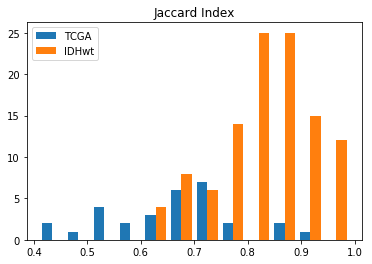

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.title('Jaccard Index')
plt.hist([whole_dice_TCGA,whole_jaccard_IDHwt], bins=12)
plt.legend(['TCGA', 'IDHwt'])
plt.savefig('./result_stats_img/histogram_jaccard.png')

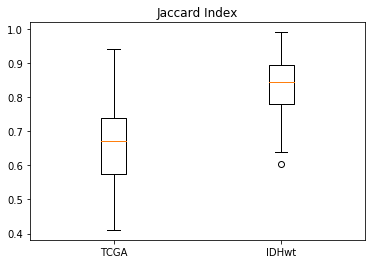

In [11]:
plt.title('Jaccard Index')
plt.boxplot([whole_dice_TCGA,whole_jaccard_IDHwt], labels=['TCGA', 'IDHwt'])
plt.savefig('./result_stats_img/boxplot_jaccard.png')